In [57]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [64]:
import pandas as pd
import json
from tabulate import tabulate

def load_json_lines(filename):
    with open(filename, 'r', encoding='utf-8') as f:
        return [json.loads(line) for line in f]


# Load the data
receipts = load_json_lines('/content/drive/My Drive/receipts.json')
users = load_json_lines('/content/drive/My Drive/users.json')
brands = load_json_lines('/content/drive/My Drive/brands.json')



for receipt in receipts:
    if 'rewardsReceiptItemList' not in receipt:
        receipt['rewardsReceiptItemList'] = []

# Convert to DataFrames
df_receipts = pd.json_normalize(receipts)
df_users = pd.json_normalize(users)
df_brands = pd.json_normalize(brands)

# Display the first few rows of each DataFrame
print("Receipts DataFrame:")
print(tabulate(df_receipts.head(), headers='keys', tablefmt='psql'))

print("\nUsers DataFrame:")
print(tabulate(df_users.head(), headers='keys', tablefmt='psql'))

print("\nBrands DataFrame:")
print(tabulate(df_brands.head(), headers='keys', tablefmt='psql'))



Receipts DataFrame:
+----+---------------------+-------------------------------------------------------------------------------------+----------------+----------------------+----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [65]:
def convert_dates(df):
    date_columns = [col for col in df.columns if 'date' in col.lower()]
    for col in date_columns:
        if df[col].dtype == 'int64' or df[col].dtype == 'float64':
            df[col] = pd.to_datetime(df[col], unit='ms', errors='coerce')

    return df


# Convert date columns from Unix timestamp to actual timestamp
df_receipts = convert_dates(df_receipts)
df_users = convert_dates(df_users)
df_brands = convert_dates(df_brands)


# Display the first few rows of each DataFrame
print("Receipts DataFrame:")
print(tabulate(df_receipts.head(), headers='keys', tablefmt='psql'))

print("\nUsers DataFrame:")
print(tabulate(df_users.head(), headers='keys', tablefmt='psql'))

print("\nBrands DataFrame:")
print(tabulate(df_brands.head(), headers='keys', tablefmt='psql'))

Receipts DataFrame:
+----+---------------------+-------------------------------------------------------------------------------------+----------------+----------------------+----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [66]:
# Get table information
tables_info = [
    get_table_info(df_receipts, 'Receipts'),
    get_table_info(df_users, 'Users'),
    get_table_info(df_brands, 'Brands')
]

In [67]:
def get_table_info(df, table_name):
    non_null_records = df.notnull().sum().sum()
    null_records = df.isnull().sum().sum()
    info = {
        'Table Name': table_name,
        'Number of Records': len(df),
        'Number of Attributes': len(df.columns),
        'Non-null Records': non_null_records,
        'Null Records': null_records
    }
    return info

def get_data_types_info(df, table_name):
    data_types = {
        'Table Name': [],
        'Attribute': [],
        'Data Type': []
    }

    for column, dtype in df.dtypes.items():
        data_types['Table Name'].append(table_name)
        data_types['Attribute'].append(column)
        data_types['Data Type'].append(dtype)

    return pd.DataFrame(data_types)

def create_summary_table(tables):
    summary_data = {
        'Table Name': [],
        'Number of Records': [],
        'Number of Attributes': [],
        'Non-null Records': [],
        'Null Records': []
    }

    for table_info in tables:
        summary_data['Table Name'].append(table_info['Table Name'])
        summary_data['Number of Records'].append(table_info['Number of Records'])
        summary_data['Number of Attributes'].append(table_info['Number of Attributes'])
        summary_data['Non-null Records'].append(table_info['Non-null Records'])
        summary_data['Null Records'].append(table_info['Null Records'])

    return pd.DataFrame(summary_data)

def display_null_distribution(df, table_name):
    null_distribution = df.isnull().sum()
    null_df = pd.DataFrame({
        'Table Name': table_name,
        'Attribute': null_distribution.index,
        'Null Count': null_distribution.values,
        'Null Percentage': (null_distribution / len(df)) * 100
    })
    return null_df

def display_unique_values(df, table_name):
    unique_values = {
        'Table Name': [],
        'Attribute': [],
        'Unique Values': []
    }

    for column in df.columns:
        try:
            unique_count = df[column].nunique()
        except TypeError:  # Handle unhashable types
            unique_count = 'Unhashable type'

        unique_values['Table Name'].append(table_name)
        unique_values['Attribute'].append(column)
        unique_values['Unique Values'].append(unique_count)

    return pd.DataFrame(unique_values)

def display_basic_statistics(df, table_name):
    stats_df = df.describe(include='all').transpose().reset_index()
    stats_df['Table Name'] = table_name
    return stats_df

# Get data types information
data_types_info = pd.concat([
    get_data_types_info(df_receipts, 'Receipts'),
    get_data_types_info(df_users, 'Users'),
    get_data_types_info(df_brands, 'Brands')
], ignore_index=True)

# Get null distribution information
null_distribution_info = pd.concat([
    display_null_distribution(df_receipts, 'Receipts'),
    display_null_distribution(df_users, 'Users'),
    display_null_distribution(df_brands, 'Brands')
], ignore_index=True)

# Get unique values information
unique_values_info = pd.concat([
    display_unique_values(df_receipts, 'Receipts'),
    display_unique_values(df_users, 'Users'),
    display_unique_values(df_brands, 'Brands')
], ignore_index=True)

# Get basic statistics
basic_statistics_info = pd.concat([
    display_basic_statistics(df_receipts, 'Receipts'),
    display_basic_statistics(df_users, 'Users'),
    display_basic_statistics(df_brands, 'Brands')
], ignore_index=True)

# Create summary table
summary_df = create_summary_table(tables_info)

# Display the summary table and data types table
print("Data Quality Check Summary:")
print(tabulate(summary_df, headers='keys', tablefmt='psql'))

print("\nData Types Information:")
print(tabulate(data_types_info, headers='keys', tablefmt='psql'))

print("\nNull Distribution Information:")
print(tabulate(null_distribution_info, headers='keys', tablefmt='psql'))

print("\nUnique Values Information:")
print(tabulate(unique_values_info, headers='keys', tablefmt='psql'))

print("\nBasic Statistics Information:")
print(tabulate(basic_statistics_info, headers='keys', tablefmt='psql'))

Data Quality Check Summary:
+----+--------------+---------------------+------------------------+--------------------+----------------+
|    | Table Name   |   Number of Records |   Number of Attributes |   Non-null Records |   Null Records |
|----+--------------+---------------------+------------------------+--------------------+----------------|
|  0 | Receipts     |                1119 |                     15 |              12625 |           4160 |
|  1 | Users        |                 495 |                      7 |               3299 |            166 |
|  2 | Brands       |                1167 |                      9 |               8852 |           1651 |
+----+--------------+---------------------+------------------------+--------------------+----------------+

Data Types Information:
+----+--------------+-------------------------+----------------+
|    | Table Name   | Attribute               | Data Type      |
|----+--------------+-------------------------+----------------|
|  

In [68]:
# Convert specified columns to float data type
def convert_columns_to_float(df, columns):
    for column in columns:
        try:
            df[column] = df[column].astype(float)
            print(f"Converted {column} to float.")
        except ValueError:
            print(f"Error converting {column} to float. Check for non-numeric values.")
    return df

columns_to_convert = [
    'pointsEarned',
    'totalSpent'
]

df_receipts = convert_columns_to_float(df_receipts, columns_to_convert)

# Display the data types to confirm the conversion
print("\nUpdated Data Types:")
print(df_receipts.dtypes)

Converted pointsEarned to float.
Converted totalSpent to float.

Updated Data Types:
bonusPointsEarned                 float64
bonusPointsEarnedReason            object
pointsEarned                      float64
purchasedItemCount                float64
rewardsReceiptItemList             object
rewardsReceiptStatus               object
totalSpent                        float64
userId                             object
_id.$oid                           object
createDate.$date           datetime64[ns]
dateScanned.$date          datetime64[ns]
finishedDate.$date         datetime64[ns]
modifyDate.$date           datetime64[ns]
pointsAwardedDate.$date    datetime64[ns]
purchaseDate.$date         datetime64[ns]
dtype: object


In [69]:
# Check completeness for all columns
def check_completeness(df):
    completeness_results = {
        'Table Name': [],
        'Attribute': [],
        'Missing Values': [],
        'Missing Percentage': []
    }

    for column in df.columns:
        missing_values = df[column].isnull().sum()
        missing_percentage = (missing_values / len(df)) * 100

        completeness_results['Table Name'].append(df.attrs['name'])
        completeness_results['Attribute'].append(column)
        completeness_results['Missing Values'].append(missing_values)
        completeness_results['Missing Percentage'].append(missing_percentage)

    return pd.DataFrame(completeness_results)

# Check accuracy for all numeric columns
def check_accuracy(df):
    accuracy_issues = {
        'Table Name': [],
        'Attribute': [],
        'Issue': []
    }

    for column in df.select_dtypes(include=['number']).columns:
        inaccurate_values = df[df[column] < 0]
        for index, row in inaccurate_values.iterrows():
            accuracy_issues['Table Name'].append(df.attrs['name'])
            accuracy_issues['Attribute'].append(column)
            accuracy_issues['Issue'].append(f'Negative value at index {index}')

    return pd.DataFrame(accuracy_issues)

# Check consistency for all date columns
def check_consistency(df):
    consistency_issues = {
        'Table Name': [],
        'Attribute': [],
        'Issue': []
    }

    for column in df.columns:
        if 'date' in column.lower():
            try:
                pd.to_datetime(df[column], errors='raise')
            except Exception as e:
                consistency_issues['Table Name'].append(df.attrs['name'])
                consistency_issues['Attribute'].append(column)
                consistency_issues['Issue'].append(f'Invalid date format: {str(e)}')

    return pd.DataFrame(consistency_issues)

# Check validity for specific rules
def check_validity(df):
    validity_issues = {
        'Table Name': [],
        'Attribute': [],
        'Issue': []
    }

    if 'state' in df.columns:
        valid_states = ['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY']  # Complete the list of valid state codes
        invalid_states = df[~df['state'].isin(valid_states)]
        for index, row in invalid_states.iterrows():
            validity_issues['Table Name'].append(df.attrs['name'])
            validity_issues['Attribute'].append('state')
            validity_issues['Issue'].append(f'Invalid state code {row["state"]} at index {index}')

    return pd.DataFrame(validity_issues)

# Check integrity for referential integrity
def check_integrity(df, reference_df, key):
    integrity_issues = {
        'Table Name': [],
        'Attribute': [],
        'Issue': []
    }

    if key in df.columns and key in reference_df.columns:
        invalid_keys = df[~df[key].isin(reference_df[key])]
        for index, row in invalid_keys.iterrows():
            integrity_issues['Table Name'].append(df.attrs['name'])
            integrity_issues['Attribute'].append(key)
            integrity_issues['Issue'].append(f'Invalid reference key {row[key]} at index {index}')

    return pd.DataFrame(integrity_issues)

# Set DataFrame attributes for identification
df_receipts.attrs['name'] = 'Receipts'
df_users.attrs['name'] = 'Users'
df_brands.attrs['name'] = 'Brands'

# Check completeness
completeness_results = pd.concat([
    check_completeness(df_receipts),
    check_completeness(df_users),
    check_completeness(df_brands)
], ignore_index=True)

# Check accuracy
accuracy_results = pd.concat([
    check_accuracy(df_receipts),
    check_accuracy(df_users),
    check_accuracy(df_brands)
], ignore_index=True)

# Check consistency
consistency_results = pd.concat([
    check_consistency(df_receipts),
    check_consistency(df_users),
    check_consistency(df_brands)
], ignore_index=True)

# Check validity
validity_results = pd.concat([
    check_validity(df_receipts),
    check_validity(df_users),
    check_validity(df_brands)
], ignore_index=True)

# Check integrity
integrity_results = check_integrity(df_receipts, df_users, 'userId')

# Display results
print("Completeness Check Results:")
print(tabulate(completeness_results, headers='keys', tablefmt='psql'))

print("\nAccuracy Check Results:")
print(tabulate(accuracy_results, headers='keys', tablefmt='psql'))

print("\nConsistency Check Results:")
print(tabulate(consistency_results, headers='keys', tablefmt='psql'))

print("\nValidity Check Results:")
print(tabulate(validity_results, headers='keys', tablefmt='psql'))

print("\nIntegrity Check Results:")
print(tabulate(integrity_results, headers='keys', tablefmt='psql'))

Completeness Check Results:
+----+--------------+-------------------------+------------------+----------------------+
|    | Table Name   | Attribute               |   Missing Values |   Missing Percentage |
|----+--------------+-------------------------+------------------+----------------------|
|  0 | Receipts     | bonusPointsEarned       |              575 |             51.3852  |
|  1 | Receipts     | bonusPointsEarnedReason |              575 |             51.3852  |
|  2 | Receipts     | pointsEarned            |              510 |             45.5764  |
|  3 | Receipts     | purchasedItemCount      |              484 |             43.2529  |
|  4 | Receipts     | rewardsReceiptItemList  |                0 |              0       |
|  5 | Receipts     | rewardsReceiptStatus    |                0 |              0       |
|  6 | Receipts     | totalSpent              |              435 |             38.874   |
|  7 | Receipts     | userId                  |                0 |      

In [70]:
import numpy as np
import pandas as pd
from scipy import stats
from tabulate import tabulate

# Detect outliers using IQR and Z-score
def detect_outliers(df, table_name):
    outliers = {
        'Table Name': [],
        'Attribute': [],
        'IQR Outlier Count': [],
        'Z-score Outlier Count': []
    }

    numeric_columns = df.select_dtypes(include=['number']).columns
    for column in numeric_columns:
        # IQR Method
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        iqr_outlier_condition = (df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR))
        iqr_outlier_count = df[iqr_outlier_condition].shape[0]

        # Z-score Method
        z_scores = stats.zscore(df[column].dropna())
        abs_z_scores = np.abs(z_scores)
        z_outlier_condition = abs_z_scores > 3
        z_outlier_count = np.sum(z_outlier_condition)

        outliers['Table Name'].append(table_name)
        outliers['Attribute'].append(column)
        outliers['IQR Outlier Count'].append(iqr_outlier_count)
        outliers['Z-score Outlier Count'].append(z_outlier_count)

    return pd.DataFrame(outliers)

# Detect outliers for all tables
outliers_receipts = detect_outliers(df_receipts, 'Receipts')
outliers_users = detect_outliers(df_users, 'Users')
outliers_brands = detect_outliers(df_brands, 'Brands')

# Combine and display outlier detection results
outliers_results = pd.concat([outliers_receipts, outliers_users, outliers_brands], ignore_index=True)
print("\nOutlier Detection Results:")
print(tabulate(outliers_results, headers='keys', tablefmt='psql'))


Outlier Detection Results:
+----+--------------+--------------------+---------------------+-------------------------+
|    | Table Name   | Attribute          |   IQR Outlier Count |   Z-score Outlier Count |
|----+--------------+--------------------+---------------------+-------------------------|
|  0 | Receipts     | bonusPointsEarned  |                   0 |                       0 |
|  1 | Receipts     | pointsEarned       |                  36 |                      17 |
|  2 | Receipts     | purchasedItemCount |                  43 |                      15 |
|  3 | Receipts     | totalSpent         |                  55 |                       7 |
+----+--------------+--------------------+---------------------+-------------------------+


# **EDA**

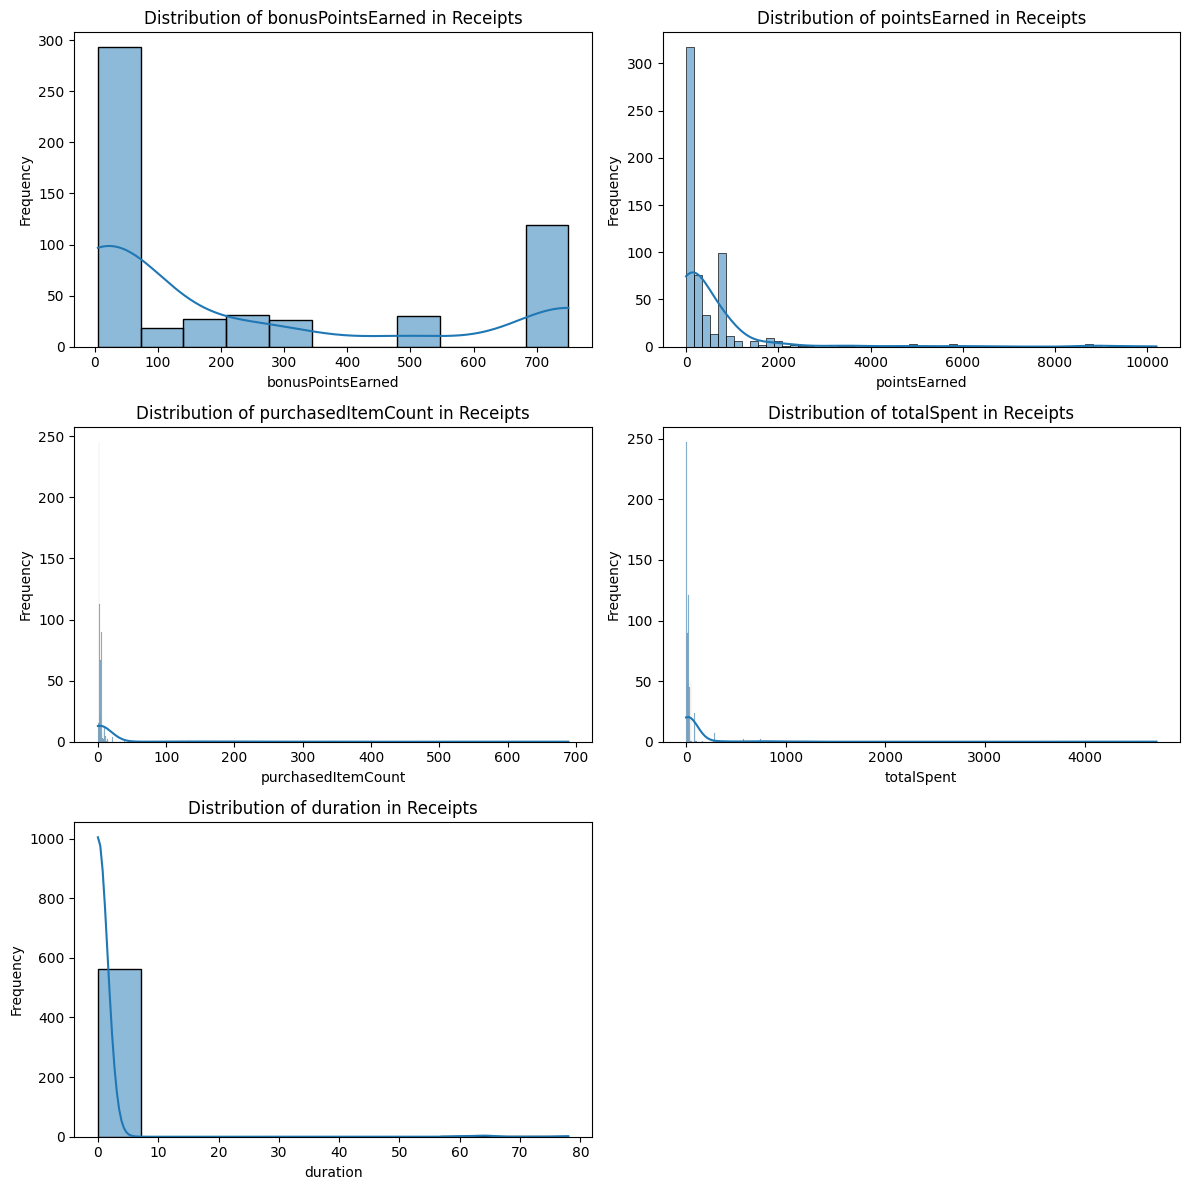

ValueError: Image size of 987241x1009 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 1200x1200 with 5 Axes>

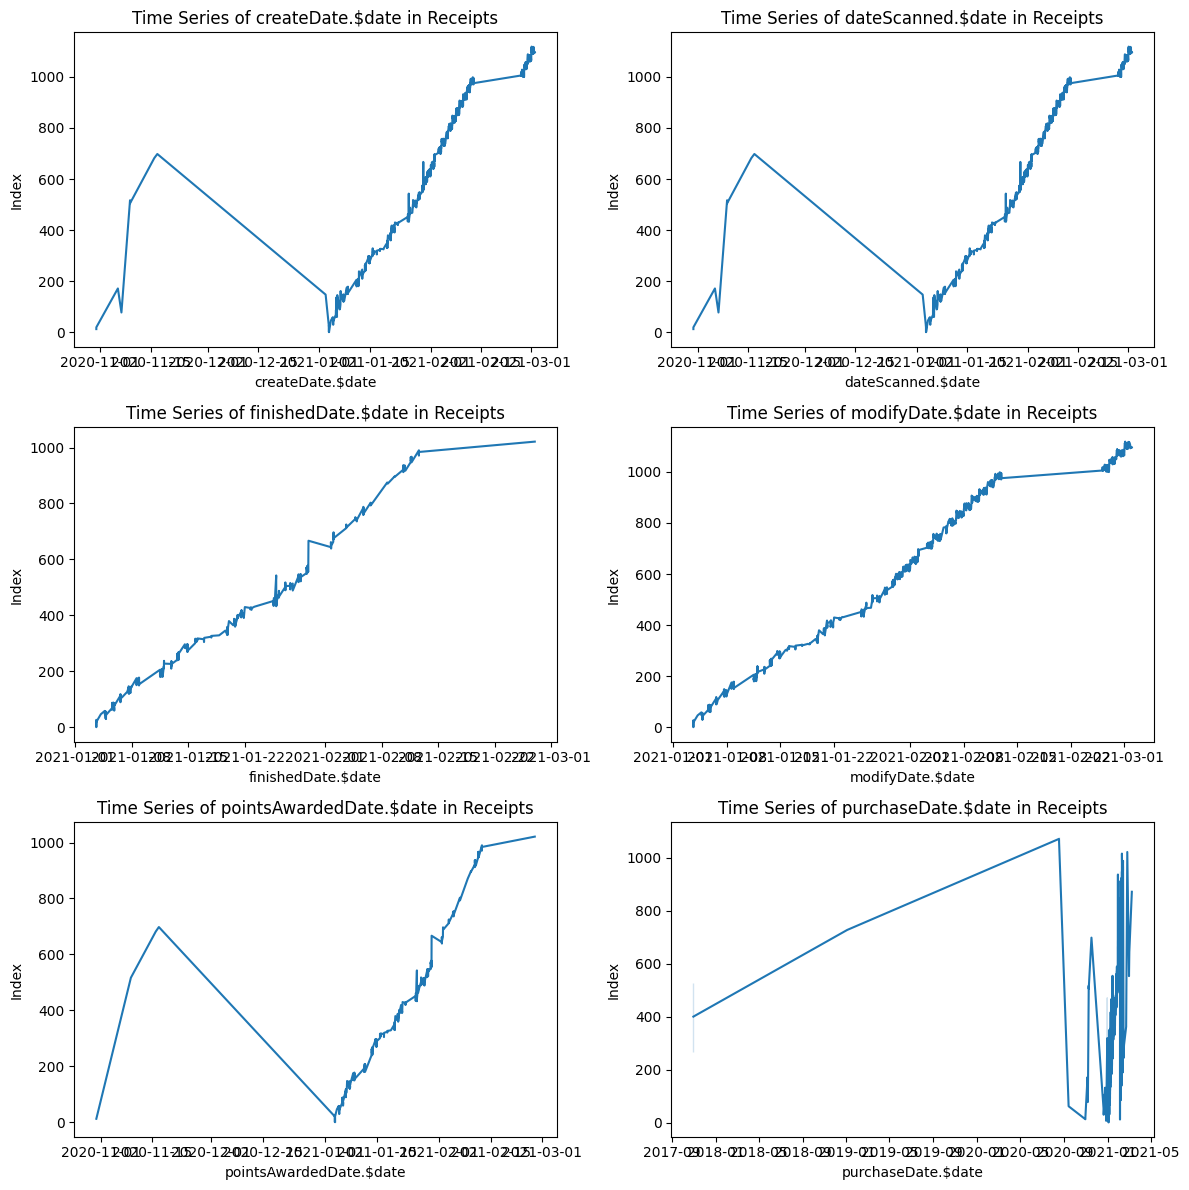

No numeric columns to plot in Users


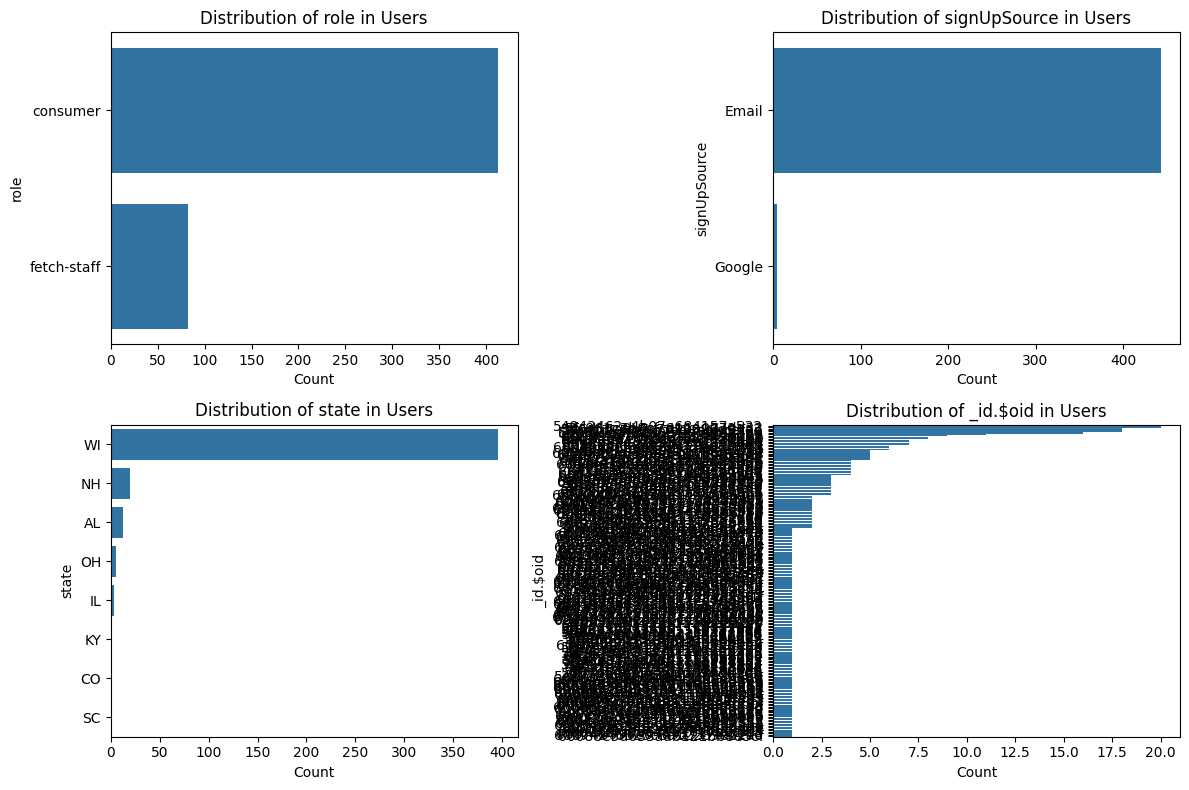

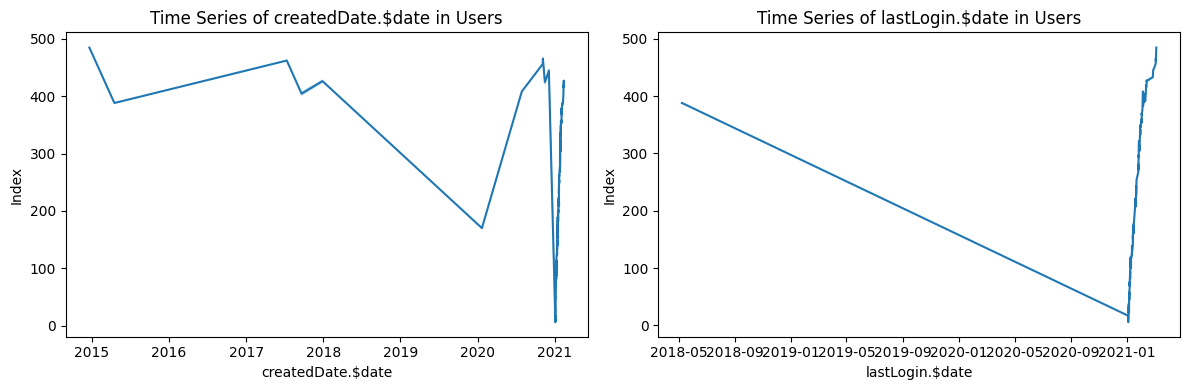

No numeric columns to plot in Brands


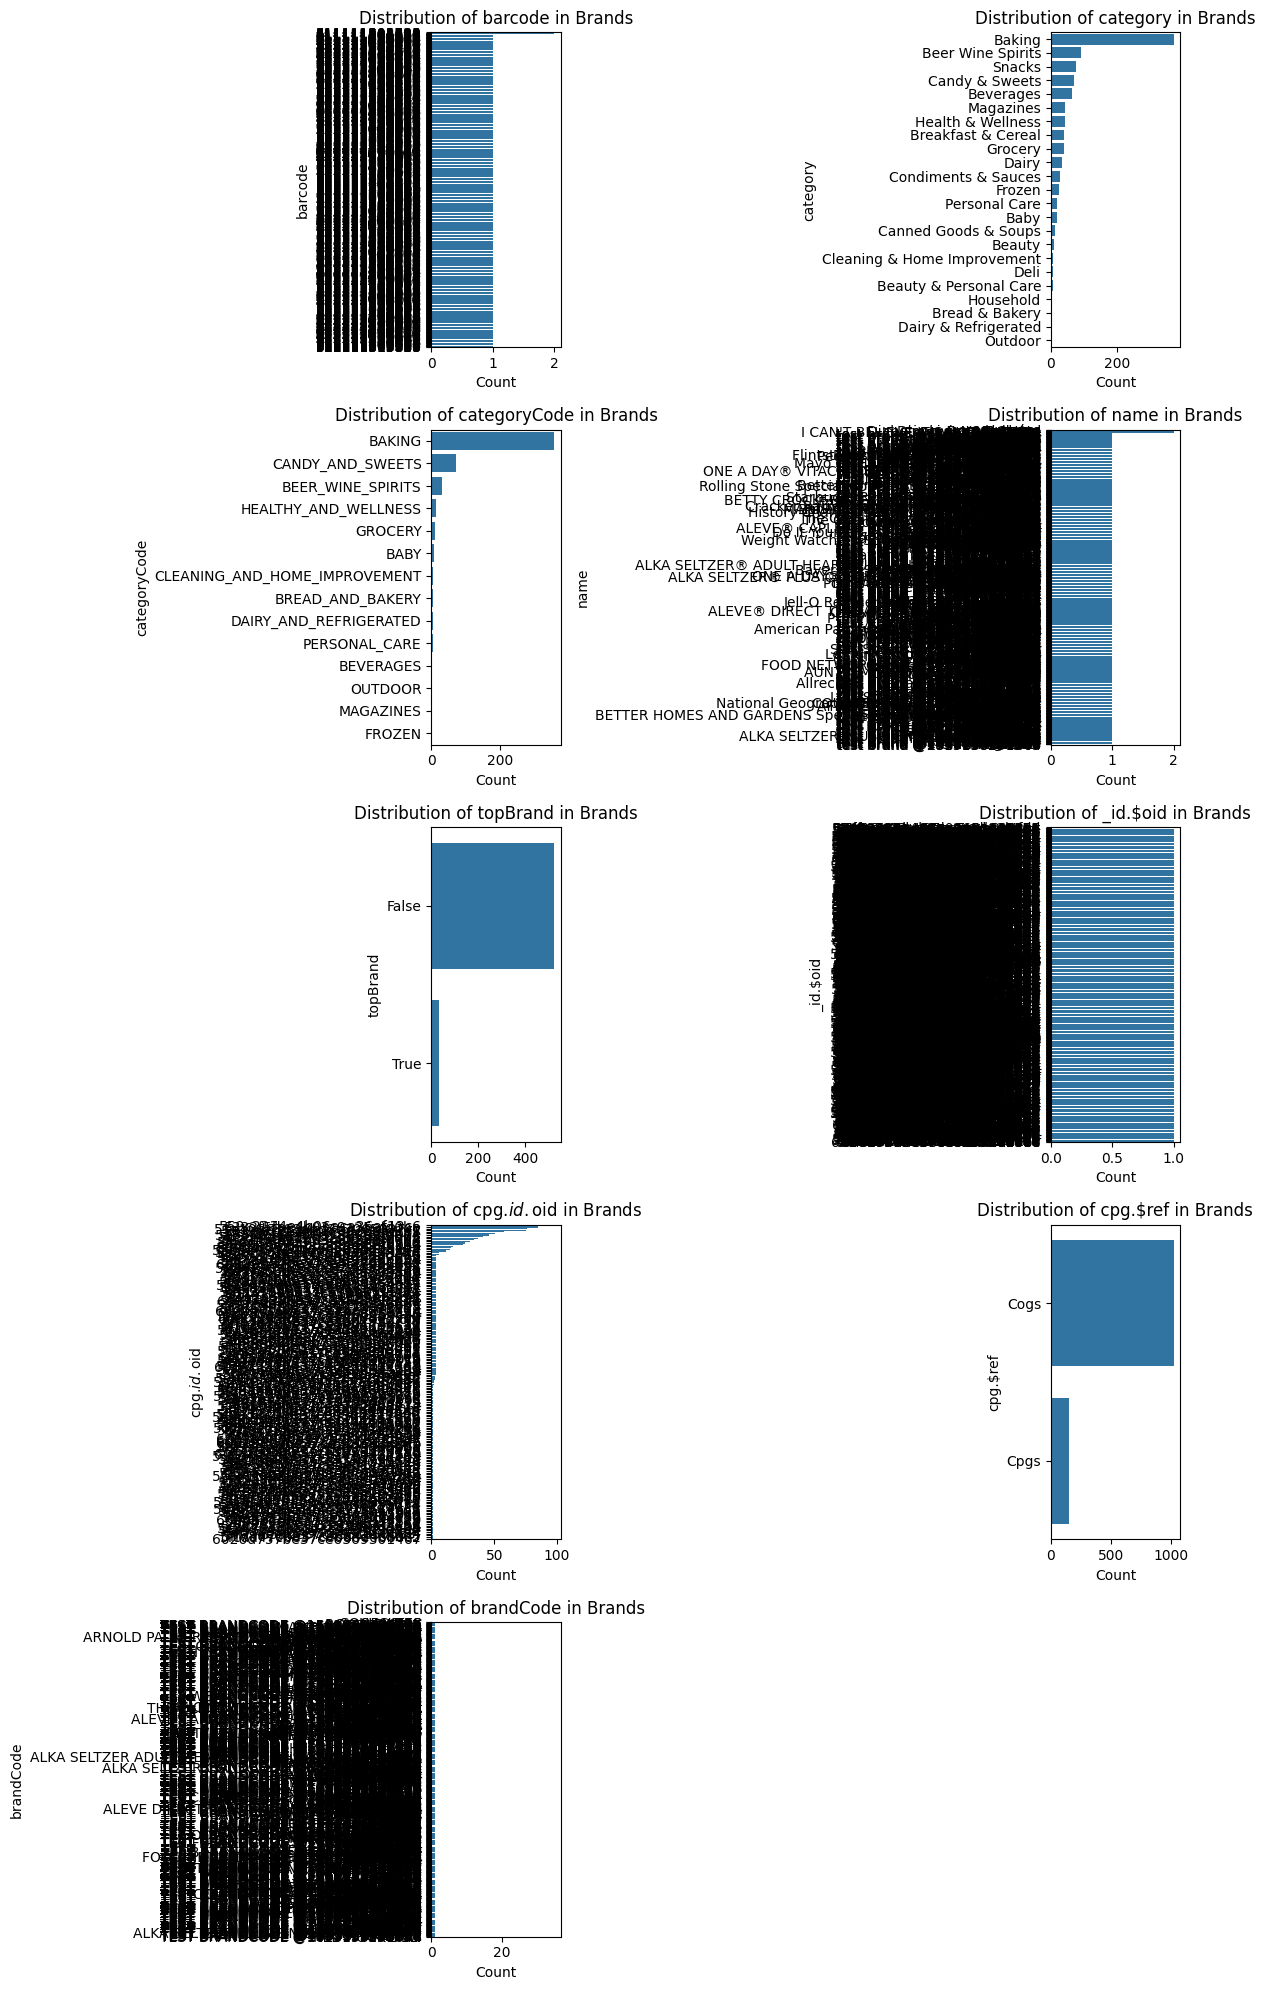

No date columns to plot in Brands


In [81]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize distributions for numeric columns
def visualize_numeric_distributions(df, table_name):
    numeric_columns = df.select_dtypes(include=['number']).columns
    for column in numeric_columns:
        plt.figure(figsize=(10, 6))
        sns.histplot(df[column], kde=True)
        plt.title(f'Distribution of {column} in {table_name}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.show()

# Visualize distributions for categorical columns
def visualize_categorical_distributions(df, table_name):
    categorical_columns = df.select_dtypes(include=['object']).columns
    for column in categorical_columns:
        plt.figure(figsize=(10, 6))
        sns.countplot(y=df[column], order=df[column].value_counts().index)
        plt.title(f'Distribution of {column} in {table_name}')
        plt.xlabel('Count')
        plt.ylabel(column)
        plt.show()

# Visualize time series data
def visualize_time_series(df, table_name):
    date_columns = [col for col in df.columns if 'date' in col.lower()]
    for date_col in date_columns:
        plt.figure(figsize=(10, 6))
        df[date_col] = pd.to_datetime(df[date_col], errors='coerce')
        sns.lineplot(data=df, x=date_col, y=df.index)
        plt.title(f'Time Series of {date_col} in {table_name}')
        plt.xlabel(date_col)
        plt.ylabel('Index')
        plt.show()

# Visualize distributions for all tables
visualize_numeric_distributions(df_receipts, 'Receipts')
visualize_categorical_distributions(df_receipts, 'Receipts')
visualize_time_series(df_receipts, 'Receipts')

visualize_numeric_distributions(df_users, 'Users')
visualize_categorical_distributions(df_users, 'Users')
visualize_time_series(df_users, 'Users')

visualize_numeric_distributions(df_brands, 'Brands')
visualize_categorical_distributions(df_brands, 'Brands')
visualize_time_series(df_brands, 'Brands')


Typical Time Period Between `dateScanned` and `finishedDate`:
+----+-------------+-----------+
|    | Statistic   |     Value |
|----+-------------+-----------|
|  0 | count       | 568       |
|  1 | mean        |   0.5     |
|  2 | std         |   5.59856 |
|  3 | min         |   0       |
|  4 | 25%         |   0       |
|  5 | 50%         |   0       |
|  6 | 75%         |   0       |
|  7 | max         |  78       |
+----+-------------+-----------+


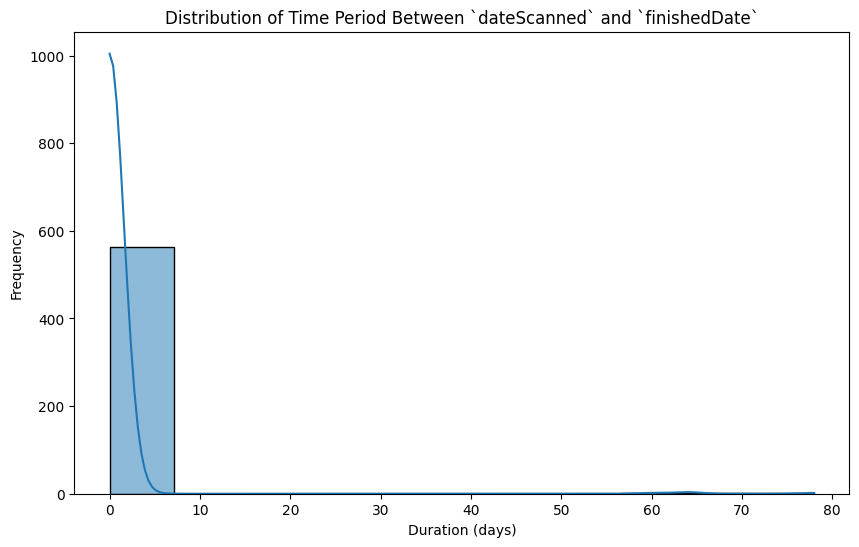


Brand with the Lowest `bonusPointsEarned`:
+----+---------+---------------------+
|    | name    |   bonusPointsEarned |
|----+---------+---------------------|
|  1 | Swanson |                  15 |
+----+---------+---------------------+

User with the Most `rewardsReceiptStatus` = `DENIED`:
+----------+----------------+
| userId   | denied_count   |
|----------+----------------|
+----------+----------------+


In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate


# 1. Typical Time Period Between `dateScanned` and `finishedDate`
df_receipts['duration'] = (df_receipts['finishedDate.$date'] - df_receipts['dateScanned.$date']).dt.days
duration_stats = df_receipts['duration'].describe()

print("\nTypical Time Period Between `dateScanned` and `finishedDate`:")
print(tabulate(duration_stats.reset_index(), headers=['Statistic', 'Value'], tablefmt='psql'))

# Visualize the distribution of the duration
plt.figure(figsize=(10, 6))
sns.histplot(df_receipts['duration'].dropna(), kde=True)
plt.title('Distribution of Time Period Between `dateScanned` and `finishedDate`')
plt.xlabel('Duration (days)')
plt.ylabel('Frequency')
plt.show()

# 2. Brand with the Lowest `bonusPointsEarned`
df_receipts_expanded = df_receipts.explode('rewardsReceiptItemList').dropna(subset=['rewardsReceiptItemList'])
df_items = pd.json_normalize(df_receipts_expanded['rewardsReceiptItemList'])
df_items = df_items.merge(df_receipts_expanded[['bonusPointsEarned', '_id.$oid']], left_index=True, right_index=True)
df_items_brands = df_items.merge(df_brands, how='left', left_on='barcode', right_on='barcode')
df_items_brands['bonusPointsEarned'] = pd.to_numeric(df_items_brands['bonusPointsEarned'], errors='coerce')
brand_bonus_points = df_items_brands.groupby('name')['bonusPointsEarned'].mean().reset_index()
brand_with_lowest_bonus_points = brand_bonus_points.sort_values(by='bonusPointsEarned').head(1)

print("\nBrand with the Lowest `bonusPointsEarned`:")
print(tabulate(brand_with_lowest_bonus_points, headers='keys', tablefmt='psql'))

# 3. User with the Most `rewardsReceiptStatus` = `DENIED`
user_denied_counts = df_receipts[df_receipts['rewardsReceiptStatus'] == 'DENIED'].groupby('userId').size().reset_index(name='denied_count')
user_with_most_denied = user_denied_counts.sort_values(by='denied_count', ascending=False).head(1)

print("\nUser with the Most `rewardsReceiptStatus` = `DENIED`:")
print(tabulate(user_with_most_denied, headers='keys', tablefmt='psql'))

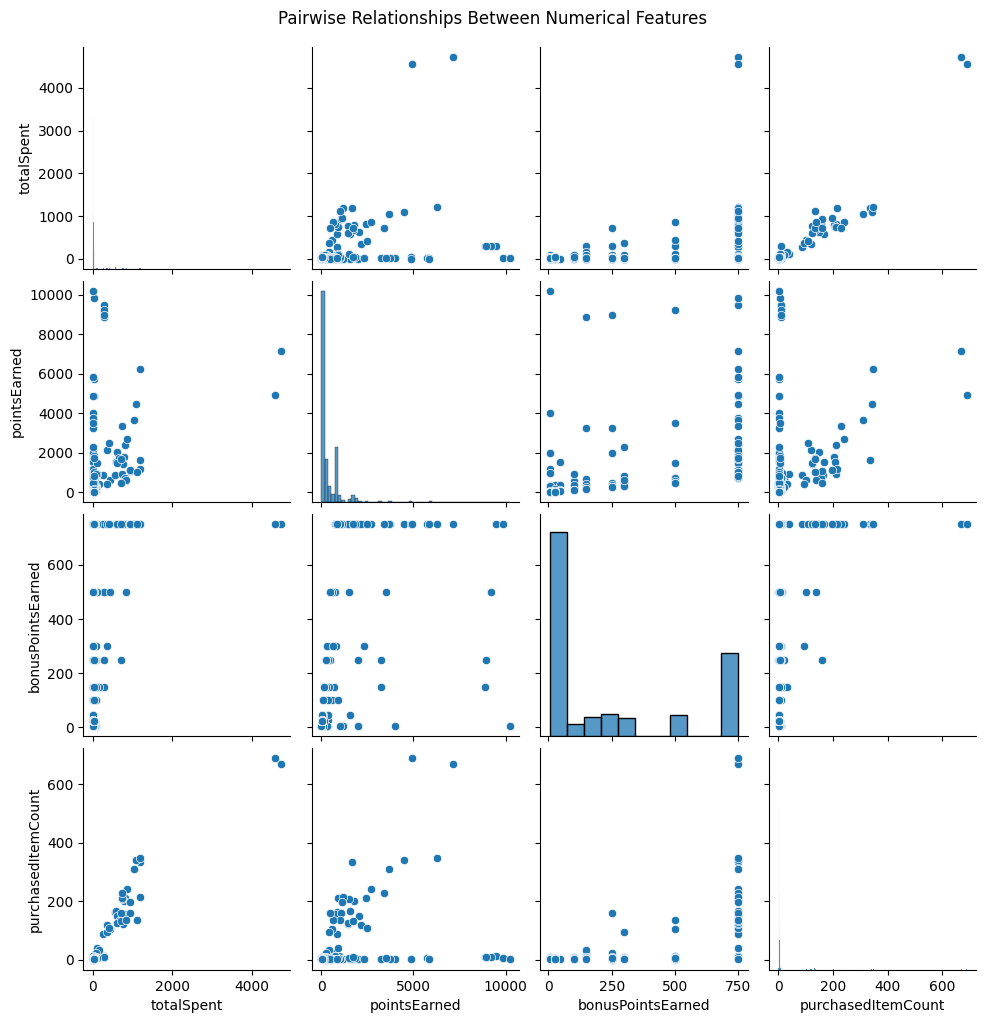

In [74]:
# Pair plot for numerical features in receipts
sns.pairplot(df_receipts[['totalSpent', 'pointsEarned', 'bonusPointsEarned', 'purchasedItemCount']].dropna())
plt.suptitle('Pairwise Relationships Between Numerical Features', y=1.02)
plt.show()